In [4]:
"""
날짜 : 2020-08-20
이름 : 이성진
내용 : RNN 실습하기
"""

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

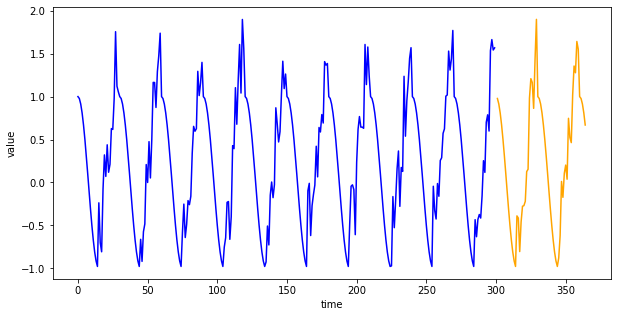

In [5]:
#시계열 데이터 만들기
time = np.arange(365)
month_time = (time % 30) / 30

time_series = np.where(month_time < 0.5,
                       np.cos(2 * np.pi * month_time),
                       np.cos(2 * np.pi * month_time) + np.random.random(365))
time_series

plt.figure(figsize=(10, 5))
plt.xlabel('time')
plt.ylabel('value')

#학습 데이터
plt.plot(np.arange(0, 300), time_series[:300], color='blue')

#검증 데이터
plt.plot(np.arange(301, 365), time_series[301:], color='orange')

In [24]:
#RNN 학습을 위한 데이터 전처리
def make_sequence(time_series, n):
    train_data, train_label = [], []
    
    for i in range(len(time_series)):
        t = time_series[i:(i+n)]
        
        if(i+n) < len(time_series):
            train_data.append(t)
            train_label.append(time_series[i+n])
        else:
            break
    
    return np.array(train_data), np.array(train_label)

n = 10
train_data, train_label = make_sequence(time_series, n)
train_label

train_data = train_data.reshape(-1, n, 1)
train_label = train_label.reshape(-1, 1)

print(train_data.shape)
print(train_label.shape)

#학습데이터
_train_data = train_data[:300]
_train_label = train_label[:300]

#테스트데이터
_test_data = train_data[300:]
_test_label = train_label[300:]

print(_train_data.shape)
print(_train_label.shape)

#데이터 이해하기
test_arr = np.arange(100)
test_arr

a, b = make_sequence(test_arr, 10)

for i in range(10):
    print(a[i], '--->', b[i])



(355, 10, 1)
(355, 1)
(300, 10, 1)
(300, 1)
[0 1 2 3 4 5 6 7 8 9] ---> 10
[ 1  2  3  4  5  6  7  8  9 10] ---> 11
[ 2  3  4  5  6  7  8  9 10 11] ---> 12
[ 3  4  5  6  7  8  9 10 11 12] ---> 13
[ 4  5  6  7  8  9 10 11 12 13] ---> 14
[ 5  6  7  8  9 10 11 12 13 14] ---> 15
[ 6  7  8  9 10 11 12 13 14 15] ---> 16
[ 7  8  9 10 11 12 13 14 15 16] ---> 17
[ 8  9 10 11 12 13 14 15 16 17] ---> 18
[ 9 10 11 12 13 14 15 16 17 18] ---> 19


In [39]:
#모델 구성하기
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(SimpleRNN(units=32, activation='tanh', input_shape=(10, 1)))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 32)                1088      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [40]:
#모델 설정하기
model.compile(optimizer='adam',
              loss='mse', 
              metrics=['acc'])

In [41]:
#모델 학습하기
model.fit(_train_data, _train_label, epochs=100, batch_size=16)

Epoch 1/100
19/19 [==============================] - 0s 1ms/step - loss: 0.1066 - acc: 0.0300
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0614 - acc: 0.0333
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0574 - acc: 0.0333
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0560 - acc: 0.0333
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0519 - acc: 0.0333
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0485 - acc: 0.0333
Epoch 7/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0468 - acc: 0.0333
Epoch 8/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0451 - acc: 0.0333
Epoch 9/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0456 - acc: 0.0333
Epoch 10/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0463 - acc: 0.0333
Epoch 11/100
19/19 [==============================] - 0s 99

19/19 [==============================] - 0s 997us/step - loss: 0.0395 - acc: 0.0333
Epoch 87/100
19/19 [==============================] - 0s 997us/step - loss: 0.0432 - acc: 0.0333
Epoch 88/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0373 - acc: 0.0333
Epoch 89/100
19/19 [==============================] - 0s 997us/step - loss: 0.0382 - acc: 0.0333
Epoch 90/100
19/19 [==============================] - 0s 997us/step - loss: 0.0377 - acc: 0.0333
Epoch 91/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0393 - acc: 0.0333
Epoch 92/100
19/19 [==============================] - 0s 997us/step - loss: 0.0375 - acc: 0.0333
Epoch 93/100
19/19 [==============================] - 0s 997us/step - loss: 0.0363 - acc: 0.0333
Epoch 94/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0384 - acc: 0.0333
Epoch 95/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0388 - acc: 0.0333
Epoch 96/100
19/19 [==============================]

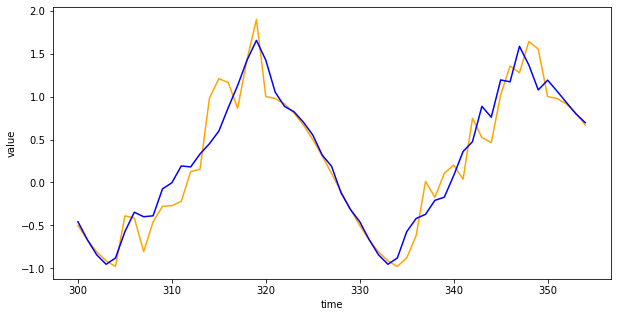

In [42]:
#예측하기
result = model.predict(_test_data)

result_range = np.arange(len(_train_label), len(_train_label)+ len(result))

plt.figure(figsize=(10, 5))
plt.xlabel('time')
plt.ylabel('value')

plt.plot(result_range, _test_label.reshape(-1), color='orange')
plt.plot(result_range, result.reshape(-1), color='blue')

In [ ]:
#